# omega-prime: Tutorial for using the python library

## Create omega-prime files

To create files in accordance with the omega-prime specification, you need the map information as ASAM OpenDRIVE XML and the infomration on dynamic elements as ASAM OSI GroundTruth messages. Alternatively, the information on dynamic elements can be provided as a table.



### Create from ASAM OSI
The following code creates a omega-prime file from an ASAM OSI trace file (e.g., created from esmini ([see example_files/README.md](example_files/README.md))) and an ASAM OpenDRIVE map.


In [1]:
import omega_prime

r = omega_prime.Recording.from_file("example_files/pedestrian.osi", xodr_path="example_files/fabriksgatan.xodr")
r.to_mcap("example.mcap")

### Create from table

You can also directly create a recording from object data in table form (we use polars). Create a table `df` like the following:

|   total_nanos |   idx |       x |        y |     z |    vel_x |   vel_y |   vel_z |      acc_x |      acc_y |   acc_z |   length |   width |   height |   roll |   pitch |     yaw |   type |   role |   subtype |
|--------------:|------:|--------:|---------:|------:|---------:|--------:|--------:|-----------:|-----------:|--------:|---------:|--------:|---------:|-------:|--------:|--------:|-------:|-------:|----------:|
|       0       |     0 | 42.6987 | -69.8783 | 0.75  | -2.04032 | 9.78964 |       0 |  0         |  0         |       0 |     5.04 |     2   |      1.5 |      0 |       0 | 1.77627 |      2 |      0 |         4 |
|       0       |     1 | 35.6784 | -23.5705 | 0.923 |  0       | 0       |       0 |  0         |  0         |       0 |     0.6  |     0.5 |      1.8 |      0 |       0 | 1.7984  |      3 |     -1 |        -1 |
|       3.3e+07 |     0 | 42.6306 | -69.5554 | 0.75  | -2.04288 | 9.78896 |       0 | -0.0774077 | -0.020523  |       0 |     5.04 |     2   |      1.5 |      0 |       0 | 1.7768  |      2 |      0 |         4 |
|       3.3e+07 |     1 | 35.6784 | -23.5705 | 0.923 |  0       | 0       |       0 |  0         |  0         |       0 |     0.6  |     0.5 |      1.8 |      0 |       0 | 1.7984  |      3 |     -1 |        -1 |
|       6.6e+07 |     0 | 42.5623 | -69.2325 | 0.75  | -2.04801 | 9.7879  |       0 | -0.155563  | -0.0323452 |       0 |     5.04 |     2   |      1.5 |      0 |       0 | 1.77732 |      2 |      0 |         4 |
|       6.6e+07 |     1 | 35.6784 | -23.5705 | 0.923 |  0       | 0       |       0 |  0         |  0         |       0 |     0.6  |     0.5 |      1.8 |      0 |       0 | 1.7984  |      3 |     -1 |        -1 |

`type`, `subtyp` and `role` have to be integers and correspond to the enumerations `betterosi.MovingObjectType`, `betterosi.MovingObjectVehicleClassificationType` and `betterosi.MovingObjectVehicleClassificationRole`. The `role` and `subtype` have to be `-1` when the `type` is not of `TYPE_VEHICLE`.

The enumartions are defined as shown below.

In [2]:
import betterosi

print(f"MovingObjectType: { ({o.name: o.value for o in betterosi.MovingObjectType}) }")
print(
    f"MovingObjectVehicleClassificationType: { ({o.name: o.value for o in betterosi.MovingObjectVehicleClassificationType}) }"
)
print(
    f"MovingObjectVehicleClassificationRole: { ({o.name: o.value for o in betterosi.MovingObjectVehicleClassificationRole}) }"
)

MovingObjectType: {'TYPE_UNKNOWN': 0, 'TYPE_OTHER': 1, 'TYPE_VEHICLE': 2, 'TYPE_PEDESTRIAN': 3, 'TYPE_ANIMAL': 4}
MovingObjectVehicleClassificationType: {'TYPE_UNKNOWN': 0, 'TYPE_OTHER': 1, 'TYPE_SMALL_CAR': 2, 'TYPE_COMPACT_CAR': 3, 'TYPE_CAR': 4, 'TYPE_LUXURY_CAR': 5, 'TYPE_DELIVERY_VAN': 6, 'TYPE_HEAVY_TRUCK': 7, 'TYPE_SEMITRACTOR': 16, 'TYPE_SEMITRAILER': 8, 'TYPE_TRAILER': 9, 'TYPE_MOTORBIKE': 10, 'TYPE_BICYCLE': 11, 'TYPE_BUS': 12, 'TYPE_TRAM': 13, 'TYPE_TRAIN': 14, 'TYPE_WHEELCHAIR': 15, 'TYPE_STANDUP_SCOOTER': 17}
MovingObjectVehicleClassificationRole: {'ROLE_UNKNOWN': 0, 'ROLE_OTHER': 1, 'ROLE_CIVIL': 2, 'ROLE_AMBULANCE': 3, 'ROLE_FIRE': 4, 'ROLE_POLICE': 5, 'ROLE_PUBLIC_TRANSPORT': 6, 'ROLE_ROAD_ASSISTANCE': 7, 'ROLE_GARBAGE_COLLECTION': 8, 'ROLE_ROAD_CONSTRUCTION': 9, 'ROLE_MILITARY': 10}


In [3]:
import polars as pl

import omega_prime

df = pl.read_csv("example_files/example.csv")
r = omega_prime.Recording(df=df, map=omega_prime.asam_odr.MapOdr.from_file("example_files/fabriksgatan.xodr"))

## Read and plot omega-prime file

In [1]:
import omega_prime

(-75.0, 20.0)

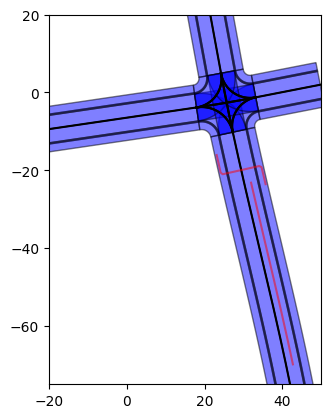

In [2]:
r = omega_prime.Recording.from_file("example.mcap")
ax = r.plot()
ax.set_xlim(-20, 50)
ax.set_ylim(-75, 20)

(-75.0, 20.0)

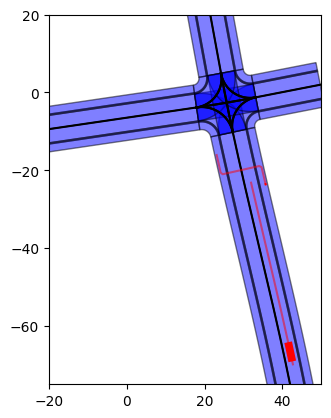

In [3]:
ax = r.plot_frame(10)
ax.set_xlim(-20, 50)
ax.set_ylim(-75, 20)

In [6]:
r.map

In [7]:
r.moving_objects

{0: <omega_prime.recording.MovingObject at 0x19c503a9ad0>,
 1: <omega_prime.recording.MovingObject at 0x19c1c06c3d0>}

## File Validation
By default, data is validated on file reading which takes time. to skip validation read the file with `omega_prime.Recording.from_file(..., validate=False)`

# Interpolation
A simple (angle aware) linear (nearest neighbour for classification type data) interpolation function is build in

In [8]:
r.interpolate(hz=100)
r.interpolate(new_nanos=[0, int(1e8), int(2e8), int(3e8)])

# CLI usage

In [9]:
!omega-prime --help

                                                                               
 Usage: omega-prime [OPTIONS] COMMAND [ARGS]...                                
                                                                               
┌─ Options ───────────────────────────────────────────────────────────────────┐
│ --install-completion          Install completion for the current shell.     │
│ --show-completion             Show completion for the current shell, to     │
│                               copy it or customize the installation.        │
│ --help                        Show this message and exit.                   │
└─────────────────────────────────────────────────────────────────────────────┘
┌─ Commands ──────────────────────────────────────────────────────────────────┐
│ from-lxd   Convert datasets from LevelXData to omega-prime.                 │
│ from-osi   Convert from ASAM OSI GroundTruth trace.                         │
│ from-csv   Convert from csv table acco

## Create Omega file from ASAM OSI and ASAM OpenDRIVE

In [10]:
!omega-prime from-osi --help

                                                                               
 Usage: omega-prime from-osi [OPTIONS] INPUT OUTPUT                            
                                                                               
 Convert from ASAM OSI GroundTruth trace.                                      
                                                                               
┌─ Arguments ─────────────────────────────────────────────────────────────────┐
│ *    input       FILE  Path to ASAM OSI trace file (either `.osi` or        │
│                        `.mcap`)                                             │
│                        [default: None]                                      │
│                        [required]                                           │
│ *    output      FILE  Desired filename of omega file [default: None]       │
│                        [required]                                           │
└───────────────────────────────────────

In [11]:
!omega-prime from-osi ./example_files/pedestrian.osi example.mcap --odr ./example_files/fabriksgatan.xodr

## Create Omega file from CSV and ASAM OpenDRIVE

In [12]:
!omega-prime from-csv --help

                                                                               
 Usage: omega-prime from-csv [OPTIONS] INPUT OUTPUT                            
                                                                               
 Convert from csv table according to schema                                    
                                                                               
┌─ Arguments ─────────────────────────────────────────────────────────────────┐
│ *    input       FILE  Path to csv according to omega moving object csv     │
│                        schema                                               │
│                        [default: None]                                      │
│                        [required]                                           │
│ *    output      FILE  Desired filename of omega file [default: None]       │
│                        [required]                                           │
└───────────────────────────────────────

In [13]:
!omega-prime from-csv ./example_files/example.csv example.mcap --odr ./example_files/fabriksgatan.xodr

## Validation check of omega file

In [14]:
!omega-prime validate --help

                                                                               
 Usage: omega-prime validate [OPTIONS] INPUT                                   
                                                                               
 Check an omega-prime file for specification conformance.                      
                                                                               
┌─ Arguments ─────────────────────────────────────────────────────────────────┐
│ *    input      FILE  Path to omega file to validate [default: None]        │
│                       [required]                                            │
└─────────────────────────────────────────────────────────────────────────────┘
┌─ Options ───────────────────────────────────────────────────────────────────┐
│ --help          Show this message and exit.                                 │
└─────────────────────────────────────────────────────────────────────────────┘



In [15]:
!omega-prime validate ./example.mcap

File example.mcap is valid.
